# Linear regression from scratch in python 

In [1]:
import pandas as pd

In [33]:
import matplotlib.pyplot as plt 
import csv

In [12]:
# Create a list of data
data = [
    [2.5, 21],
    [5.1, 47],
    [3.2, 27],
    [8.5, 75],
    [3.5, 30],
    [1.5, 20],
    [9.2, 88],
    [5.5, 60],
    [8.3, 81],
    [2.7, 25],
    [7.7, 85],
    [5.9, 62],
    [4.5, 41],
    [3.3, 42],
    [1.1, 17],
    [8.9, 95],
    [2.5, 30],
    [1.9, 24],
    [6.1, 67],
    [7.4, 69],
    [2.7, 30],
    [4.8, 54],
    [3.8, 35],
    [6.9, 76],
    [7.8, 86],
]

In [13]:
# creating csv without pandas 
# Opening the CSV file in writing mode
with open("data.csv", "w", newline="") as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Writing the header row
    writer.writerow(["Hours", "Scores"])

    # Writing the data rows
    writer.writerows(data)

In [16]:
data1 = pd.read_csv('data.csv')

In [17]:
data1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
# creating csv with pandas 
df = pd.DataFrame(data, columns=["Hours", "Scores"])

# Write the DataFrame to a CSV file
df.to_csv("data.csv", index=False)

In [19]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [21]:
def loss_function(m,b ,points ):
    total_error = 0
    for i in range(len(points)):
        x= points.iloc[i].Hours 
        y= points.iloc[i].Scores
        total_error += (y - (m*x + b ))**2
    total_error/float(len(points))    

0.6357120000000002 0.10296000000000001
1.2306711174912 0.199341702912
1.7874896312296777 0.2895667722244442
2.308612371770555 0.37402984261654904
2.79632745497025 0.45310025251668795
3.2527763274665897 0.5271236656030328
3.6799631682392864 0.5964235883653016
4.079763687526318 0.6613027903901404
4.453933361725953 0.7220446336055963
4.804115140437985 0.7789143163204442
5.131846659480287 0.832160037520053
5.438566991547875 0.8820140865303825
5.725622964151803 0.9286938628340459
5.994275072575436 0.9724028305157201
6.24570301380766 1.0133314115271925
6.481010865748575 1.0516578216937302
6.701231934425869 1.0875488531320792
6.907333290502502 1.12116060651513
7.100220014992301 1.1526391763981028
7.280739172823331 1.1821212926150237
7.449683531694141 1.2097349205614125
7.607795042549708 1.2355998229985876
7.755768096957362 1.2598280858460722
7.894252575683512 1.2825246102704795
8.023856701855273 1.303787573231287
8.1451497112332 1.323708858505427
8.258664351318384 1.3423744600830145
8.3648992

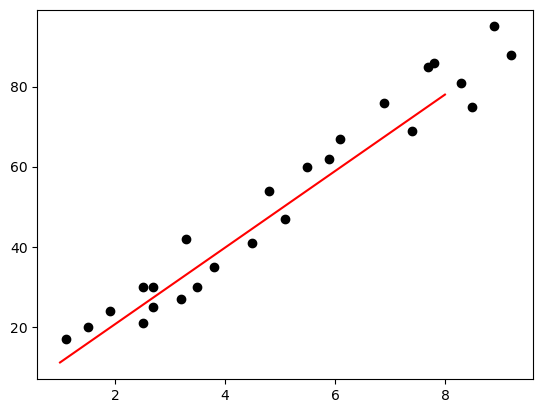

In [34]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores

        m_gradient += -(2/n)*x *(y - (m_now * x + b_now) )
        b_gradient += -(2/n) *(y - (m_now * x + b_now) )

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    return m, b

m = 0
b = 0
L = 0.001
epochs = 50

for i in range(epochs):
    m, b = gradient_descent(m, b, data, L) or (m, b)
    print(m, b)

plt.scatter(df.Hours, df.Scores, color="black")
plt.plot(list(range(1, 9)), [m*x + b for x in range(1, 9)], color="red")
plt.show()